# Tasks about Titanic-ED

# 1 Data Description"Python-Data-Analysis_Titanic-ED
The original data is downloaded from : https://www.kaggle.com/competitions/titanic/data



| Column          | Description                                                                                      |
| --------------- | ------------------------------------------------------------------------------------------------ |
| **PassengerId** | Unique ID assigned to each passenger.                                                            |
| **Survived**    | Survival indicator (0 = No, 1 = Yes).                                                            |
| **Pclass**      | Passenger class (1 = 1st class, 2 = 2nd class, 3 = 3rd class). Represents socio-economic status. |
| **Name**        | Full name of the passenger (often includes titles like Mr., Mrs., Miss, etc.).                   |
| **Sex**         | Gender (male, female).                                                                           |
| **Age**         | Age of passenger in years (some missing values).                                                 |
| **SibSp**       | Number of siblings and spouses aboard the Titanic.                                               |
| **Parch**       | Number of parents and children aboard the Titanic.                                               |
| **Ticket**      | Ticket number.                                                                                   |
| **Fare**        | Amount of money the passenger paid for the ticket.                                               |
| **Cabin**       | Cabin number (many missing values).                                                              |
| **Embarked**    | Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).                            |




# Importing Libraries

In [60]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Exploring the Data

In [61]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning Projects/Exploratory data analysis (EDA) /Titanic_EDA_Task/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# The DataFrame clearly shows this classification of features
 1.   Excluded Features: The variables PassengerId, Name, and Ticket are not relevant for analysis and will be removed.
2.   Categorical Features: The dataset includes Sex, Pclass, SibSp, Parch, and Embarked as categorical variables.
3. Numerical Features: The continuous variables are Age and Fare.
4. Target Feature: The outcome variable to be predicted is Survived.

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [63]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [64]:
df.columns = df.columns.str.lower()

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Check duplicate Values

In [66]:
df.duplicated().sum()

np.int64(0)

There are no any duplicate value

# Check and resolving Missing Values

In [67]:
df.isnull().sum()

,0
passengerid,0
survived,0
pclass,0
name,0
sex,0
age,177
sibsp,0
parch,0
ticket,0
fare,0


# Task 1: Try to impute Missing Values in "Embarked" feature instead of Dropping


To do this task, It can be follow these steps:
1. Looking for the describtion of this feature
2. estimate the (mode, mean..) according to the feature type
3. Impute the missing values
4. Verify the results

In [68]:
df['embarked'].describe()

,embarked
count,889
unique,3
top,S
freq,644


In [69]:
df['embarked'].mode()

,embarked
0,S


In [70]:
df['embarked'].mode()[0]

'S'

In [71]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

/tmp/ipython-input-1964997694.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)


In [72]:
df.isnull().sum()

,0
passengerid,0
survived,0
pclass,0
name,0
sex,0
age,177
sibsp,0
parch,0
ticket,0
fare,0


# Filling the missing values for Age
For more accurucy, we should test several method
1- Calculate and ploting the mean age
2- verify the relationship between age and other features
3- maybe we should make some groups ... let's see

In [73]:
df.groupby(['sex', 'pclass'])['age'].median()
df['age'] = df.groupby(['pclass', 'sex'])['age'].transform(lambda x: x.fillna(x.median()))
# Verification
df.isnull().sum()

,0
passengerid,0
survived,0
pclass,0
name,0
sex,0
age,0
sibsp,0
parch,0
ticket,0
fare,0


# Drop unnecessary  Columns
'PassengerId', 'Name', 'Ticket', 'Cabin'

In [74]:
df.drop(['passengerid', 'name', 'ticket', 'cabin'], axis=1, inplace=True)

# Task 2: Create New Feature: "family_size" to combine "parch" and " sibsp" and explore it with Survival Rate

In [75]:
df['family_size'] = df['sibsp'] + df['parch']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    object 
 8   family_size  891 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [76]:
print (df.head())
print ("µµµµµµµµµ")
print (df.tail())

   survived  pclass     sex   age  sibsp  parch     fare embarked  family_size
0         0       3    male  22.0      1      0   7.2500        S            1
1         1       1  female  38.0      1      0  71.2833        C            1
2         1       3  female  26.0      0      0   7.9250        S            0
3         1       1  female  35.0      1      0  53.1000        S            1
4         0       3    male  35.0      0      0   8.0500        S            0
µµµµµµµµµ
     survived  pclass     sex   age  sibsp  parch   fare embarked  family_size
886         0       2    male  27.0      0      0  13.00        S            0
887         1       1  female  19.0      0      0  30.00        S            0
888         0       3  female  21.5      1      2  23.45        S            3
889         1       1    male  26.0      0      0  30.00        C            0
890         0       3    male  32.0      0      0   7.75        Q            0


family_size
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64
-------------------------------------
family_size
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: survived, dtype: float64


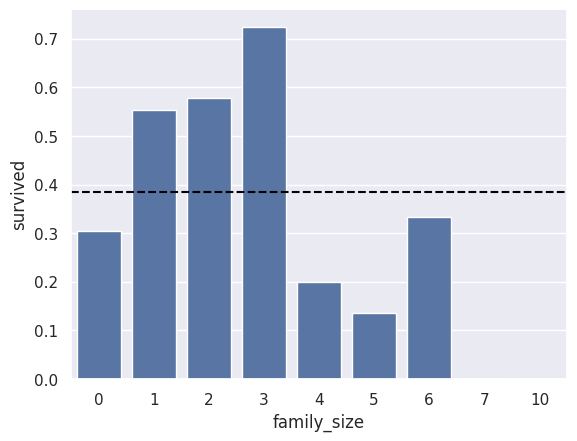

In [77]:
# Survival rate for family_size
print (df['family_size'].value_counts())
print ('-------------------------------------')
def survival_rate(df, col):
    print(df.groupby(col).survived.mean())
    sns.barplot(x=col, y='survived', data=df, errorbar=None);
    #plot horizontal line for overall survival rate
    plt.axhline(df.survived.mean(), color='black', linestyle='--')
    plt.show()
for col in ['family_size']:
    survival_rate(df, col)

# The insights from histogramm are:
Family size 1–3: Survival rate is above the overall average  Especially family size = 3, which has the highest survival probability (~0.72).

Family size 0 (alone): Lower survival rate (~0.3), below average.

Family size ≥4: Survival rate drops significantly (family size 4–5 particularly low, ~0.2 and ~0.13).

Family size 6: Slightly above those, around ~0.34, but still below average.

Larger family sizes (7–10) likely had too few passengers, so they don’t appear in the chart.

👉 This suggests that small families had a survival advantage, while being alone or in a large family reduced survival chances.

# Task 3: How many passengers were alone? What is their Survival Rate ?
It means that there are no "parch" or " sibsp"
It can be estimated from the above results or by using the following function

In [78]:
print (df['family_size'].value_counts()[0])
print (df['family_size'].value_counts(normalize= True)[0])

537
0.6026936026936027


In [79]:
print (df[df['family_size'] ==0].value_counts())
print (df[df['family_size'] ==0].survived.mean())

survived  pclass  sex     age   sibsp  parch  fare     embarked  family_size
0         3       male    25.0  0      0      7.8958   S         0              14
                                              8.0500   S         0              12
                                              7.7500   Q         0               9
1         3       female  21.5  0      0      7.7500   Q         0               7
0         2       male    30.0  0      0      0.0000   S         0               6
                                                                                ..
          3       male    20.0  0      0      7.0500   S         0               1
                                              4.0125   C         0               1
                          19.0  0      0      14.5000  S         0               1
                                              10.1708  S         0               1
                          21.0  0      0      7.7333   Q         0               1
Name: coun

# What are top 3 categories from "family_size" have highest survival Rate ?

In [80]:
df.groupby('family_size').survived.mean().sort_values(ascending = False)

,survived
family_size,
3,0.724138
2,0.578431
1,0.552795
6,0.333333
0,0.303538
4,0.200000
5,0.136364
7,0.000000
10,0.000000


In [81]:
df.groupby('family_size').survived.mean().nlargest(3)

,survived
family_size,
3,0.724138
2,0.578431
1,0.552795


# Try differnet age groups

In [82]:
print (df['age'].value_counts())

age
25.00    117
21.50     42
30.00     34
40.00     34
24.00     30
        ... 
24.50      1
0.67       1
0.42       1
34.50      1
74.00      1
Name: count, Length: 89, dtype: int64


In [83]:
df.groupby('age').survived.value_counts().sort_values(ascending = False)

,,count
age,survived,
25.0,0,102
21.5,1,25
40.0,0,23
30.0,0,22
35.0,1,20
...,...,...
53.0,1,1
66.0,0,1
70.5,0,1


In [84]:
df.groupby(['age', 'sex']).survived.value_counts().nlargest(3)

,,,count
age,sex,survived,
25.0,male,0,99
21.5,female,1,25
40.0,male,0,22


# Which age groups have the lowest and highest survival rate for both females and males?

In [101]:
bins = [0, 12, 18, 35, 60, 100]  # Age ranges
labels = ['child', 'teen', 'young_adult', 'adult', 'senior']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
print (df['age_group'].value_counts())
df.groupby(['age_group', 'sex']).survived.value_counts()
print ('-------------------------------------------')
df.groupby(['age_group', 'sex']).survived.mean()

age_group
young_adult    513
adult          239
child           68
teen            45
senior          26
Name: count, dtype: int64
-------------------------------------------


/tmp/ipython-input-1779517545.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['age_group', 'sex']).survived.value_counts()
/tmp/ipython-input-1779517545.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['age_group', 'sex']).survived.mean()


age_group    sex   
child        female    0.593750
             male      0.555556
teen         female    0.826087
             male      0.136364
young_adult  female    0.715976
             male      0.151163
adult        female    0.813953
             male      0.202614
senior       female    1.000000
             male      0.136364
Name: survived, dtype: float64